In [2]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
plt.rcParams['text.usetex'] = True
import scipy
from scipy import integrate as sciint
from scipy import optimize as sciopt
from scipy.special import kn
import numba as nb
import pickle
import funcs
import cProfile

c=2.9792458e10#cm s-1
mev2erg = 1.0218e-6
mpc2 = 938.72*mev2erg # erg
pi = np.pi
day2sec=5184000
Mpc2cm = 3.086e+24
cgi2mJy = 1.e26

n0 = 1.e-3 #cm-3
eps_e = 0.5
eps_b = 0.5
theta_v = 0.25
theta_j = 0.3
D_L = 41*Mpc2cm
Gshmax = 100
theta_G = 0.059 # Gaussian sigma for the jet
theta_c = 0.3 # JET TRUNCATION ANGLE
E_g = 1.16e52


In [3]:
phi = np.random.random()*pi
T=1*day2sec
nu = 3e9

theta = np.random.random()*theta_c
#theta=0.001
#phi=0.7909595069551598
%timeit res1 = funcs.integrand_scalar(theta, phi, T, nu, eps_e, eps_b, Gshmax, \
                            n0, theta_v, theta_G, theta_c, E_g)
%timeit res2 = funcs.integrand(np.array([theta,]), phi, T, nu, eps_e, eps_b, Gshmax, \
                            n0, theta_v, theta_G, theta_c, E_g)[0]
print(theta,phi)
#print(res1,res2, (res1-res2)/res2)

623 µs ± 6.96 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
741 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
0.1615689552411504 0.7829799588831601


In [12]:
nu = 3e9
step=0.0001
thetaarr=np.arange(step, theta_c+step, step)
res=np.zeros(shape=(5,4, len(thetaarr)))
for i, T in enumerate(np.array([0.01, 0.1, 1, 10, 100])*day2sec):
    for j, phi in enumerate(np.array([0, 0.2, 0.5, 1])*pi):
        for k, theta in enumerate(thetaarr):
            res[i,j,k] =  funcs.integrand_scalar(theta, phi, T, nu, eps_e, eps_b, Gshmax, \
                            n0, theta_v, theta_G, theta_c, E_g)

eg= 1.1599983338133196e+52
mu= 0.9689371572619668
t= 1666276.3494308044
gb2= 10000.0
Roc= 1666193.0418613486
abs(mu-bsh)= 0.031012846487720735
(1-mu*bsh)= 0.031111285962684643
Roc**2= 2776199252747.174
bsh 0.9999500037496876
res= 2767415057932.3594
5.409452214106397e-22 2.203654184185238 26669125197091.12
eg= 1.1599933352676378e+52
mu= 0.9689618831239174
t= 1667601.6185298716
gb2= 10000.0
Roc= 1667518.24470193
abs(mu-bsh)= 0.030988120625770166
(1-mu*bsh)= 0.031086561336934437
Roc**2= 2780617096413.806
bsh 0.9999500037496876
res= 2771811814881.3877
5.416613256925207e-22 2.201905714839274 26711633023912.395
eg= 1.1599850044060332e+52
mu= 0.9689865992962491
t= 1668928.476816757
gb2= 10000.0
Roc= 1668845.0366508763
abs(mu-bsh)= 0.03096340445343848
(1-mu*bsh)= 0.031061846400318727
Roc**2= 2785043756354.2646
bsh 0.9999500037496876
res= 2776217329039.262
5.423786664272128e-22 2.20015793068689 26754225843620.434
eg= 1.1599733413003022e+52
mu= 0.9690113057787149
t= 1670256.9268319423
gb2= 10000

6.260033052568631e-22 2.018782074703704 31796041539210.13
eg= 1.1400133147210234e+52
mu= 0.9715751917698927
t= 1820647.7034702012
gb2= 10000.0
Roc= 1820556.6779118879
abs(mu-bsh)= 0.028374811979794856
(1-mu*bsh)= 0.02847338334659233
Roc**2= 3314426617489.5693
bsh 0.9999500037496876
res= 3302952478366.058
6.268696037588835e-22 2.017107705849852 31849036214271.234
eg= 1.1396514891555062e+52
mu= 0.9715988600289535
t= 1822162.2847291965
gb2= 10000.0
Roc= 1822071.1834474993
abs(mu-bsh)= 0.028351143720734107
(1-mu*bsh)= 0.028449716270855796
Roc**2= 3319943397549.7705
bsh 0.9999500037496876
res= 3308440460794.953
6.27737465337438e-22 2.0154340240375577 31902141662934.477
eg= 1.139286505552752e+52
mu= 0.9716225185720259
t= 1823678.7647206727
gb2= 10000.0
Roc= 1823587.5876206623
abs(mu-bsh)= 0.028327485177661704
(1-mu*bsh)= 0.028426058910621887
Roc**2= 3325471689724.1465
bsh 0.9999500037496876
res= 3313939871003.155
6.286068934651306e-22 2.013761029283529 31955358163438.992
eg= 1.13891836702081

7.251474091994773e-22 1.8483305246513166 37955479928756.22
eg= 1.0861507856199103e+52
mu= 0.973984609241151
t= 1988943.6878539221
gb2= 10000.0
Roc= 1988844.2481274467
abs(mu-bsh)= 0.02596539450853652
(1-mu*bsh)= 0.026064086337173054
Roc**2= 3955501443309.629
bsh 0.9999500037496876
res= 3940523911944.6445
7.2619667317196585e-22 1.8467276965085857 38021647507179.016
eg= 1.0854817032382374e+52
mu= 0.9740072657879513
t= 1990674.0206808385
gb2= 10000.0
Roc= 1990574.49444421
abs(mu-bsh)= 0.025942737961736295
(1-mu*bsh)= 0.026041430923115172
Roc**2= 3962386817931.8228
bsh 0.9999500037496876
res= 3947369989926.2925
7.272479160114517e-22 1.845125557111194 38087959716795.93
eg= 1.0848099166407846e+52
mu= 0.9740299125946787
t= 1992406.6210087
gb2= 10000.0
Roc= 1992307.008148552
abs(mu-bsh)= 0.025920091155008818
(1-mu*bsh)= 0.026018785248643095
Roc**2= 3969287214717.834
bsh 0.9999500037496876
res= 3954230969766.847
7.283011423125979e-22 1.8435241064751744 38154416937470.55
eg= 1.0841354313596796e+

8.483354721321527e-22 1.6822666659811012 45853629536961.945
eg= 1.0013367265266349e+52
mu= 0.9763319564915464
t= 2185787.1476128655
gb2= 10000.0
Roc= 2185677.8664515037
abs(mu-bsh)= 0.023618047258141206
(1-mu*bsh)= 0.023716856445338386
Roc**2= 4777187735895.997
bsh 0.9999500037496876
res= 4757285012347.447
8.496227256312937e-22 1.6807369326744197 45937488760568.65
eg= 1.0004152076389898e+52
mu= 0.976353579349153
t= 2187781.66684599
gb2= 10000.0
Roc= 2187672.2859661453
abs(mu-bsh)= 0.023596424400534555
(1-mu*bsh)= 0.02369523466879353
Roc**2= 4785910030784.34
bsh 0.9999500037496876
res= 4765952555763.933
8.50912524110407e-22 1.6792078897729918 46021540239795.63
eg= 9.994916655332443e+51
mu= 0.9763751924432238
t= 2189778.926310728
gb2= 10000.0
Roc= 2189669.4455753993
abs(mu-bsh)= 0.023574811306463772
(1-mu*bsh)= 0.02367362265529649
Roc**2= 4794652280886.477
bsh 0.9999500037496876
res= 4774639878646.371
8.522048737632139e-22 1.6776795372921127 46105784504224.17
eg= 9.98566107380882e+51
mu=

1.0034312665161417e-21 1.521047715023643 56139275258080.086
eg= 8.916337828520566e+51
mu= 0.9786107678023513
t= 2418118.0780991646
gb2= 10000.0
Roc= 2417997.181262447
abs(mu-bsh)= 0.02133923594733622
(1-mu*bsh)= 0.021438159066554108
Roc**2= 5846710368593.139
bsh 0.9999500037496876
res= 5819731614259.371
1.0050331666217014e-21 1.5195926324219762 56247342449795.46
eg= 8.905368853586663e+51
mu= 0.9786313349692334
t= 2420440.064127873
gb2= 10000.0
Roc= 2420319.0512005608
abs(mu-bsh)= 0.021318668780454186
(1-mu*bsh)= 0.02141759292795331
Roc**2= 5857944309604.383
bsh 0.9999500037496876
res= 5830887480721.963
1.0066383975801206e-21 1.518138241836994 56355670365862.3
eg= 8.894387821523911e+51
mu= 0.9786518923498019
t= 2422765.4057544046
gb2= 10000.0
Roc= 2422644.2765687304
abs(mu-bsh)= 0.02129811139988569
(1-mu*bsh)= 0.021397036575176775
Roc**2= 5869205290791.227
bsh 0.9999500037496876
res= 5842070123724.004
1.0082469679156757e-21 1.516684543283269 56464259762019.21
eg= 8.883394810251972e+51
m

1.201609935998164e-21 1.3651403678244463 69768889980816.11
eg= 7.654217092967838e+51
mu= 0.9808144434091897
t= 2695144.0193174575
gb2= 10000.0
Roc= 2695009.2722224398
abs(mu-bsh)= 0.019135560340497904
(1-mu*bsh)= 0.019234593635233055
Roc**2= 7263074977364.925
bsh 0.9999500037496876
res= 7225679529425.784
1.203635495868077e-21 1.3637614927556174 69910782436775.36
eg= 7.642385408388317e+51
mu= 0.9808339328703222
t= 2697877.508312533
gb2= 10000.0
Roc= 2697742.6245533153
abs(mu-bsh)= 0.0191160708793654
(1-mu*bsh)= 0.019215105148500555
Roc**2= 7277815268331.811
bsh 0.9999500037496876
res= 7240305553426.286
1.2056655014763918e-21 1.3623833112617798 70053036495734.81
eg= 7.630550092310614e+51
mu= 0.9808534125231153
t= 2700615.167837981
gb2= 10000.0
Roc= 2700480.147206052
abs(mu-bsh)= 0.019096591226572257
(1-mu*bsh)= 0.019195626469617033
Roc**2= 7292593025454.021
bsh 0.9999500037496876
res= 7254968636177.349
1.2076999648306714e-21 1.3610058233567366 70195653264796.625
eg= 7.618711218305383e+51

(1-mu*bsh)= 0.017168117926755322
Roc**2= 9116773871875.057
bsh 0.9999500037496876
res= 9064129422799.027
1.453906292613182e-21 1.217625026750207 87808805974957.03
eg= 6.346275266017828e+51
mu= 0.9828994416650461
t= 3022793.468353021
gb2= 10000.0
Roc= 3022642.3400141345
abs(mu-bsh)= 0.017050562084641507
(1-mu*bsh)= 0.017149699621471393
Roc**2= 9136366715646.123
bsh 0.9999500037496876
res= 9083551977676.62
1.4565020814163756e-21 1.2163225260564143 87998069387951.23
eg= 6.334463349020628e+51
mu= 0.9829178510622281
t= 3026041.6195230866
gb2= 10000.0
Roc= 3025890.328788821
abs(mu-bsh)= 0.0170321526874595
(1-mu*bsh)= 0.017131291144690253
Roc**2= 9156012281857.72
bsh 0.9999500037496876
res= 9103026612281.348
1.459103902232314e-21 1.2150207204119936 88187843884601.69
eg= 6.322655253434122e+51
mu= 0.9829362506302315
t= 3029295.018963719
gb2= 10000.0
Roc= 3029143.5655716807
abs(mu-bsh)= 0.017013753119456076
(1-mu*bsh)= 0.0171128924965962
Roc**2= 9175710740844.314
bsh 0.9999500037496876
res= 9122

1.7596082301801965e-21 1.0858899778302493 110563089566304.05
eg= 5.1486408260759747e+51
mu= 0.9847613408376893
t= 3390918.4332816256
gb2= 10000.0
Roc= 3390748.900074846
abs(mu-bsh)= 0.015188662911998274
(1-mu*bsh)= 0.015287893536805264
Roc**2= 11497178103358.78
bsh 0.9999500037496876
res= 11422552245717.443
1.7629355332033595e-21 1.0846598307320616 110815668036452.16
eg= 5.137522849701737e+51
mu= 0.9847787270327342
t= 3394778.961098402
gb2= 10000.0
Roc= 3394609.2348797075
abs(mu-bsh)= 0.015171276716953397
(1-mu*bsh)= 0.015270508211004952
Roc**2= 11523371857530.594
bsh 0.9999500037496876
res= 11448490171202.018
1.7662710223013704e-21 1.0834303799998868 111068969295792.53
eg= 5.126414154624192e+51
mu= 0.9847961033799917
t= 3398646.095142495
gb2= 10000.0
Roc= 3398476.1755815987
abs(mu-bsh)= 0.015153900369695883
(1-mu*bsh)= 0.015253132732499619
Roc**2= 11549640315995.729
bsh 0.9999500037496876
res= 11474501777690.9
1.7696147222491227e-21 1.082201625646036 111322995829066.17
eg= 5.115314784

2.141529161621863e-21 0.9651637897680747 140182355651439.81
eg= 4.0791563440019025e+51
mu= 0.9864675866560799
t= 3816891.401651051
gb2= 10000.0
Roc= 3816700.5713931187
abs(mu-bsh)= 0.013482417093607646
(1-mu*bsh)= 0.013581733024307652
Roc**2= 14567203251672.559
bsh 0.9999500037496876
res= 14460681105636.65
2.1458248579547002e-21 0.9640040365644944 140522353424472.2
eg= 4.069166986807481e+51
mu= 0.9864839773635244
t= 3821503.037482206
gb2= 10000.0
Roc= 3821311.9766597743
abs(mu-bsh)= 0.013466026386163121
(1-mu*bsh)= 0.01356534313633706
Roc**2= 14602425222963.432
bsh 0.9999500037496876
res= 14495515622282.715
2.150131761434062e-21 0.9628449809334881 140863384027464.7
eg= 4.05919043132628e+51
mu= 0.9865003582061291
t= 3826123.044896209
gb2= 10000.0
Roc= 3825931.7530907304
abs(mu-bsh)= 0.01344964554355843
(1-mu*bsh)= 0.01354896311271303
Roc**2= 14637753779307.91
bsh 0.9999500037496876
res= 14530455079684.148
2.1544499080199015e-21 0.9616866228866525 141205451229426.03
eg= 4.049226703421480

2.7072554613524335e-21 0.8385285858926219 186135896728654.03
eg= 3.0363279637058375e+51
mu= 0.9882572741732258
t= 4396150.490704502
gb2= 10000.0
Roc= 4395930.699664158
abs(mu-bsh)= 0.011692729576461725
(1-mu*bsh)= 0.011792134984826785
Roc**2= 19324206716249.812
bsh 0.9999500037496876
res= 19161307405613.41
2.713081519388255e-21 0.8374477301017463 186620786212251.38
eg= 3.027909288699783e+51
mu= 0.988272549140305
t= 4401852.154158444
gb2= 10000.0
Roc= 4401632.078056307
abs(mu-bsh)= 0.01167745460938252
(1-mu*bsh)= 0.011776860781438692
Roc**2= 19374364950574.28
bsh 0.9999500037496876
res= 19210829735927.668
2.7189238774004244e-21 0.836367573149003 187107257553385.97
eg= 3.019505281474579e+51
mu= 0.9882878142246587
t= 4407564.923270393
gb2= 10000.0
Roc= 4407344.561551221
abs(mu-bsh)= 0.011662189525028843
(1-mu*bsh)= 0.011761596460281964
Roc**2= 19424686084235.12
bsh 0.9999500037496876
res= 19260512069388.715
2.724782591460573e-21 0.8352881150452036 187595316951220.16
eg= 3.011115949537523e

3.467419608608207e-21 0.7228223540581937 251182050196132.38
eg= 2.192229808543583e+51
mu= 0.9898924282117701
t= 5103837.747398903
gb2= 10000.0
Roc= 5103582.574649329
abs(mu-bsh)= 0.010057575537917418
(1-mu*bsh)= 0.010157062697853103
Roc**2= 26046555096264.277
bsh 0.9999500037496876
res= 25791432343779.605
3.475455318021327e-21 0.7218191336941302 251887679766404.47
eg= 2.1854545268642175e+51
mu= 0.9899066052863179
t= 5110971.20707225
gb2= 10000.0
Roc= 5110715.677676441
abs(mu-bsh)= 0.010043398463369657
(1-mu*bsh)= 0.010142886332105916
Roc**2= 26119414738047.766
bsh 0.9999500037496876
res= 25863218935409.082
3.483515227046647e-21 0.7208166133245015 252595791491749.9
eg= 2.1786939259717466e+51
mu= 0.9899207724617998
t= 5118119.633211896
gb2= 10000.0
Roc= 5117863.746421585
abs(mu-bsh)= 0.010029231287887796
(1-mu*bsh)= 0.010128719864929692
Roc**2= 26192529326936.38
bsh 0.9999500037496876
res= 25935255208724.492
3.4915994252614565e-21 0.719814792959311 253306395860916.84
eg= 2.17194799923457

4.5638504901785395e-21 0.6129662606561083 350527324585385.44
eg= 1.512166153932861e+51
mu= 0.991444821419641
t= 6024581.475145916
gb2= 10000.0
Roc= 6024280.268662457
abs(mu-bsh)= 0.008505182330046601
(1-mu*bsh)= 0.008604747103821753
Roc**2= 36291952755395.81
bsh 0.9999500037496876
res= 35872021754245.92
4.5753316765921685e-21 0.6120429025455202 351598183979700.0
eg= 1.5069990585027873e+51
mu= 0.9914578691119652
t= 6033730.18318238
gb2= 10000.0
Roc= 6033428.519297824
abs(mu-bsh)= 0.00849213463772236
(1-mu*bsh)= 0.008591700063833141
Roc**2= 36402259697476.336
bsh 0.9999500037496876
res= 35980409950482.54
4.586850375381286e-21 0.611120245527136 352673139450910.75
eg= 1.501845304704869e+51
mu= 0.991470906889711
t= 6042899.735669687
gb2= 10000.0
Roc= 6042597.61334189
abs(mu-bsh)= 0.00847909685997661
(1-mu*bsh)= 0.008578662937927417
Roc**2= 36512985916765.11
bsh 0.9999500037496876
res= 36089207196431.836
4.5984067371337545e-21 0.6101982896101499 353752209820503.56
eg= 1.4967048764724335e+51


t= 6762280.918578839
gb2= 10000.0
Roc= 6761942.829889351
abs(mu-bsh)= 0.0075664407125766164
(1-mu*bsh)= 0.0076660524199125835
Roc**2= 45723870834692.0
bsh 0.9999500037496876
res= 45129740689165.96
5.540148872291831e-21 0.5456605476977185 443613694224119.4
eg= 1.1605062012250477e+51
mu= 0.9923958767048909
t= 6773159.82541818
gb2= 10000.0
Roc= 6772821.192824142
abs(mu-bsh)= 0.0075541270447966324
(1-mu*bsh)= 0.007653739367769807
Roc**2= 45871106909967.836
bsh 0.9999500037496876
res= 45274101015581.836
5.5549149963524016e-21 0.5447897966317791 445051643012916.06
eg= 1.1562915773385694e+51
mu= 0.9924081804487123
t= 6784064.981765352
gb2= 10000.0
Roc= 6783725.803954388
abs(mu-bsh)= 0.007541823300975303
(1-mu*bsh)= 0.007641436239089527
Roc**2= 46018935783236.61
bsh 0.9999500037496876
res= 45419037902939.15
5.5697322141651514e-21 0.5439197473305676 446495427433874.1
eg= 1.1520889500966086e+51
mu= 0.9924204742684517
t= 6794996.471950288
gb2= 10000.0
Roc= 6794656.747605804
abs(mu-bsh)= 0.0075295

7.394710774715549e-21 0.4588626408188766 630452049350779.9
eg= 7.827705900782483e+50
mu= 0.9936222907491012
t= 8065486.4731643
gb2= 10000.0
Roc= 8065083.229083696
abs(mu-bsh)= 0.006327713000586321
(1-mu*bsh)= 0.006427386639663024
Roc**2= 65045567492047.1
bsh 0.9999500037496876
res= 64036863833590.74
7.416186437801457e-21 0.4580649186056947 632684454267547.6
eg= 7.796948129039408e+50
mu= 0.9936335617480366
t= 8079654.163024529
gb2= 10000.0
Roc= 8079250.210612556
abs(mu-bsh)= 0.006316442001650935
(1-mu*bsh)= 0.006416116204235323
Roc**2= 65274283965683.03
bsh 0.9999500037496876
res= 64260249618977.836
7.437743018255308e-21 0.4572678990244855 634926755726522.9
eg= 7.766288904707594e+50
mu= 0.9936448228106363
t= 8093859.157887129
gb2= 10000.0
Roc= 8093454.495278678
abs(mu-bsh)= 0.0063051809390513025
(1-mu*bsh)= 0.006404855704646661
Roc**2= 65504005667146.64
bsh 0.9999500037496876
res= 64484607774124.15
7.459380890337706e-21 0.4564715820832263 637179006435446.8
eg= 7.7357280160833e+50
mu= 0.

1.0503691138441206e-20 0.37173225817615124 967749792197009.4
eg= 4.8845329546292245e+50
mu= 0.9948532958297358
t= 9976054.573453465
gb2= 10000.0
Roc= 9975555.808131881
abs(mu-bsh)= 0.0050967079199517595
(1-mu*bsh)= 0.005196443104666604
Roc**2= 99511713681153.7
bsh 0.9999500037496876
res= 97601788190702.8
1.0537537979906456e-20 0.37101538914904686 971566294247934.6
eg= 4.863732858551731e+50
mu= 0.9948634234364545
t= 9995534.39418578
gb2= 10000.0
Roc= 9995034.6549462
abs(mu-bsh)= 0.005086580313233058
(1-mu*bsh)= 0.0051863160042903145
Roc**2= 99900717753575.52
bsh 0.9999500037496876
res= 97979572355950.98
1.0571526193539599e-20 0.3702992236244263 975401639557484.2
eg= 4.843007424045648e+50
mu= 0.9948735410945393
t= 10015071.1906021
gb2= 10000.0
Roc= 10014570.474595957
abs(mu-bsh)= 0.005076462655148273
(1-mu*bsh)= 0.005176198852050451
Roc**2= 100291621790649.08
bsh 0.9999500037496876
res= 98359179621316.94
1.060565650358299e-20 0.36958376160941087 979255939906001.9
eg= 4.822356451785195e+5

2.854313463030921e-20 0.2054525701861825 3471534667607580.0
eg= 3.1001039333527765e+50
mu= 0.9958441616929599
t= 12419666.226979872
gb2= 4322.5721751288775
Roc= 12419439.409027874
abs(mu-bsh)= 0.004040186504695065
(1-mu*bsh)= 0.004271009479194787
Roc**2= 154242475234514.62
bsh 0.9998843481976549
res= 145906575466260.62
2.88936136098539e-20 0.20397808930621816 3528688589315708.0
eg= 3.0859893224874995e+50
mu= 0.9958532640764717
t= 12448341.324374475
gb2= 4273.272782498216
Roc= 12448120.392385988
abs(mu-bsh)= 0.0040297501171451255
(1-mu*bsh)= 0.004263236620665634
Roc**2= 154955701303335.88
bsh 0.9998830141936168
res= 146469176130769.88
2.9248410524950115e-20 0.20251432492150367 3586877996166469.5
eg= 3.0719301498440573e+50
mu= 0.9958623565014509
t= 12477130.707824217
gb2= 4224.475070786466
Roc= 12476915.737105798
abs(mu-bsh)= 0.004019306606815709
(1-mu*bsh)= 0.004255490754411673
Roc**2= 155673426310838.3
bsh 0.9998816631082666
res= 147033389798374.66
2.96075740262283e-20 0.20106121932923

t= 15880702.979912315
gb2= 1319.0239843296254
Roc= 15881708.30114835
abs(mu-bsh)= 0.002948580298023473
(1-mu*bsh)= 0.0037050252129510186
Roc**2= 252228658562764.4
bsh 0.9996211472389354
res= 200731819755335.34
9.016759079421742e-20 0.10493822571402768 2.023067192884748e+16
eg= 1.9648498219790697e+50
mu= 0.9966807129049083
t= 15927518.496707639
gb2= 1301.151193098477
Roc= 15928549.9269236
abs(mu-bsh)= 0.002935233358071332
(1-mu*bsh)= 0.0037020660474988976
Roc**2= 253718702774497.78
bsh 0.9996159462629797
res= 201164320245832.44
9.115928280515522e-20 0.10428263361237336 2.0661949724926976e+16
eg= 1.9553590160509974e+50
mu= 0.9966888489020975
t= 15974668.13096918
gb2= 1283.4700126099528
Roc= 15975726.174230773
abs(mu-bsh)= 0.0029218096968633978
(1-mu*bsh)= 0.0036992033307340355
Roc**2= 255223826794002.22
bsh 0.9996106585989609
res= 201588121907677.66
9.215859292157194e-20 0.10363371060229752 2.1104492304132256e+16
eg= 1.9459084634306757e+50
mu= 0.9966969749323983
t= 16022157.748693772
gb2

t= 19876184.41457309
gb2= 422.93300861019907
Roc= 19876127.45009404
abs(mu-bsh)= 0.0014251599766379464
(1-mu*bsh)= 0.003782341368508413
Roc**2= 395060442412381.8
bsh 0.9988198720174531
res= 148856032817851.8
1.784853093626403e-19 0.07223269576862591 1.6261324054430874e+17
eg= 1.2308575645064831e+50
mu= 0.9974019207826803
t= 19903530.92765214
gb2= 419.06093990664965
Roc= 19903401.541551214
abs(mu-bsh)= 0.0014070664782740439
(1-mu*bsh)= 0.0037859976109204663
Roc**2= 396145392924223.25
bsh 0.9988089872609544
res= 147227484058252.28
1.79107914000285e-19 0.07211199795815436 1.6644384395913728e+17
eg= 1.2245814309573548e+50
mu= 0.997409119550526
t= 19930764.561251435
gb2= 415.23258556687114
Roc= 19930562.26537181
abs(mu-bsh)= 0.001388906621603514
(1-mu*bsh)= 0.003789740106853068
Roc**2= 397227312213862.75
bsh 0.9987980261721295
res= 145580337611523.38
1.7972302922520761e-19 0.0719939430527831 1.7039624706804666e+17
eg= 1.2183337994079335e+50
mu= 0.9974163083442807
t= 19957883.79803694
gb2= 4

2.0313975563560856e-19 0.07045180900299604 6.669239841215612e+17
eg= 6.969876992940993e+49
mu= 0.9981217432694003
t= 21947208.31437117
gb2= 177.77928081495648
Roc= 21936570.826171704
abs(mu-bsh)= 0.0009224098018543181
(1-mu*bsh)= 0.004673662892288988
Roc**2= 481213139611647.5
bsh 0.997199333467546
res= 94973841072538.31
2.0305203172218518e-19 0.07050799369885902 6.536782486460297e+17
eg= 6.932186558206887e+49
mu= 0.9981278644403959
t= 21956252.13604686
gb2= 176.60729286414252
Roc= 21945497.081506334
abs(mu-bsh)= 0.0009470380238177922
(1-mu*bsh)= 0.004686031267911783
Roc**2= 481604842154403.06
bsh 0.9971808264165781
res= 97331424375713.72
2.029608125035724e-19 0.07056499618844134 6.410992658970803e+17
eg= 6.894680132323215e+49
mu= 0.998133975630113
t= 21965105.403273333
gb2= 175.44718546742547
Roc= 21954232.536208063
abs(mu-bsh)= 0.0009717111291033254
(1-mu*bsh)= 0.004698464585281004
Roc**2= 481988326253896.75
bsh 0.9971622645010096
res= 99682228570162.75
2.028661605598964e-19 0.0706228

Roc**2= 487048675665302.3
bsh 0.9955301957721852
res= 253794567816280.0
1.886589681199781e-19 0.07708256222764072 3.142713384097448e+17
eg= 4.4007341407516835e+49
mu= 0.9985958287392593
t= 22084776.40990191
gb2= 110.56731654153512
Roc= 22063917.929357655
abs(mu-bsh)= 0.0030875155955117917
(1-mu*bsh)= 0.0058895510193973655
Roc**2= 486816474393430.2
bsh 0.9955083131437475
res= 255206797919135.56
1.8844137982351935e-19 0.07717854372979516 3.129281174373412e+17
eg= 4.375893149808376e+49
mu= 0.9986011212653365
t= 22079491.644263487
gb2= 110.02693188728279
Roc= 22058508.823174614
abs(mu-bsh)= 0.0031147193927866246
(1-mu*bsh)= 0.005906162885676247
Roc**2= 486577811502072.3
bsh 0.9954864018725499
res= 256605409454712.44
1.8822356646861792e-19 0.0772747547156413 3.116053838239639e+17
eg= 4.3511798799324484e+49
mu= 0.9986064038054024
t= 22074059.7926625
gb2= 109.49107848037298
Roc= 22052952.70362992
abs(mu-bsh)= 0.0031419415933556794
(1-mu*bsh)= 0.00592281327434907
Roc**2= 486332722948538.1
bsh 

abs(mu-bsh)= 0.0059217112540428385
(1-mu*bsh)= 0.007747009995419107
Roc**2= 435801017324280.56
bsh 0.993162508555661
res= 333120492982260.2
1.6713164973466637e-19 0.0876548983099992 2.329186803216026e+17
eg= 2.419656842211225e+49
mu= 0.9990884935076827
t= 20891852.32575279
gb2= 72.12320837876197
Roc= 20859025.462885622
abs(mu-bsh)= 0.005949806685516257
(1-mu*bsh)= 0.007766565538643411
Roc**2= 435098943261310.75
bsh 0.9931386868221664
res= 333320383198541.06
1.6694313906576734e-19 0.08776065537941365 2.3241854302720083e+17
eg= 2.4052867030843557e+49
mu= 0.9990927572147767
t= 20875055.92165887
gb2= 71.87095782627762
Roc= 20842124.789002415
abs(mu-bsh)= 0.005977903887196878
(1-mu*bsh)= 0.00778614295799962
Roc**2= 434394165720348.94
bsh 0.9931148533275799
res= 333511288688496.94
1.6675512593468353e-19 0.0878664243903228 2.319211576770194e+17
eg= 2.390995038297506e+49
mu= 0.9990970109309432
t= 20858181.384255856
gb2= 71.62032534084634
Roc= 20825146.26369348
abs(mu-bsh)= 0.00600600277393637


1.5241614974497723e-19 0.09694436648121801 1.962975711965922e+17
eg= 1.416864289864869e+49
mu= 0.9994254500263764
t= 19172984.340304714
gb2= 54.826723000892194
Roc= 19132136.708946202
abs(mu-bsh)= 0.008422205078146061
(1-mu*bsh)= 0.009566135940015541
Roc**2= 366038655049806.8
bsh 0.9910032449482303
res= 322267281030634.06
1.5226959530178506e-19 0.09704926336994073 1.9594149742635216e+17
eg= 1.4080936392696684e+49
mu= 0.9994288343799772
t= 19151283.769784123
gb2= 54.674814933483546
Roc= 19110358.949802544
abs(mu-bsh)= 0.008450248703796848
(1-mu*bsh)= 0.00958742722213668
Roc**2= 365205819190298.2
bsh 0.9909785856761804
res= 321888232236730.5
1.5212346895219922e-19 0.09715413990640716 1.955863716175112e+17
eg= 1.3993732605769444e+49
mu= 0.9994322087392895
t= 19129547.561958052
gb2= 54.52368445311744
Roc= 19088545.871483553
abs(mu-bsh)= 0.008478290620260398
(1-mu*bsh)= 0.009608736855445721
Roc**2= 364372583487731.8
bsh 0.9909539181190291
res= 321504970251449.75
1.5197776927883631e-19 0.097

eg= 8.0618497342956e+48
mu= 0.9996875162757025
t= 17141901.349604145
gb2= 43.79263320876496
Roc= 17095403.384922232
abs(mu-bsh)= 0.010913072659077927
(1-mu*bsh)= 0.011534532304006917
Roc**2= 292252816893210.5
bsh 0.9887744436166246
res= 276506766075626.97
1.4077436465398156e-19 0.10630941464292215 1.6727826513884112e+17
eg= 8.009897219877044e+48
mu= 0.9996900110168523
t= 17118352.407997735
gb2= 43.69179322233435
Roc= 17071804.479308773
abs(mu-bsh)= 0.010941040205143526
(1-mu*bsh)= 0.01155753047634156
Roc**2= 291446508179747.06
bsh 0.9887489708117088
res= 275900459027183.97
1.4066071608512429e-19 0.1064127775477376 1.669837086657861e+17
eg= 7.958256638041278e+48
mu= 0.9996924957611019
t= 17094795.71764024
gb2= 43.591366326884625
Roc= 17048198.110824894
abs(mu-bsh)= 0.010969008564283733
(1-mu*bsh)= 0.011580549466593038
Roc**2= 290641058825933.5
bsh 0.9887234871968181
res= 275293005102293.28
1.405473725212724e-19 0.10651613077901464 1.6668966029792016e+17
eg= 7.906926273471644e+48
mu= 0.9

t= 14923318.150858002
gb2= 35.81249982881572
Roc= 14873287.89582709
abs(mu-bsh)= 0.013554180024933693
(1-mu*bsh)= 0.013795871045032548
Roc**2= 221214692832156.62
bsh 0.9863241424427167
res= 217339214103996.88
1.312763515324203e-19 0.1160180771019875 1.415663855996876e+17
eg= 4.3065284234597925e+48
mu= 0.9998798774049834
t= 14899942.780824512
gb2= 35.7410361638074
Roc= 14849886.587737134
abs(mu-bsh)= 0.013582520157291111
(1-mu*bsh)= 0.013821119350318267
Roc**2= 220519131668655.22
bsh 0.9862973572476923
res= 216712226776977.34
1.3118670628432542e-19 0.11612170405741334 1.4131227934888984e+17
eg= 4.2776085482912023e+48
mu= 0.9998814223435175
t= 14876577.408118954
gb2= 35.669804038876826
Roc= 14826495.499209099
abs(mu-bsh)= 0.013610868129181664
(1-mu*bsh)= 0.013846395436640568
Roc**2= 219824968788067.66
bsh 0.9862705542143358
res= 216085744146693.9
1.3109727276062146e-19 0.11622534802627416 1.4105854886785422e+17
eg= 4.2488706744959696e+48
mu= 0.9998829572832375
t= 14853222.172445655
gb2= 

gb2= 29.204207237712385
Roc= 12429012.17027782
abs(mu-bsh)= 0.016681798679564874
(1-mu*bsh)= 0.016704646328666417
Roc**2= 154480343528914.2
bsh 0.9833066813425535
res= 154269054249716.6
1.2268246507188393e-19 0.12737632982132535 1.161670421197696e+17
eg= 2.04588150059045e+48
mu= 0.9999889550203319
t= 12459058.50285182
gb2= 29.15165291315194
Roc= 12407355.541841514
abs(mu-bsh)= 0.016711617547555235
(1-mu*bsh)= 0.01673352280542384
Roc**2= 153942471541665.34
bsh 0.9832773374727767
res= 153740950942849.34
1.2261205120796022e-19 0.1274837438952439 1.1595014896017642e+17
eg= 2.0315122902319708e+48
mu= 0.9999894200186561
t= 12437428.694097681
gb2= 29.099228480367472
Roc= 12385719.734781405
abs(mu-bsh)= 0.01674145685853745
(1-mu*bsh)= 0.01676243958498802
Roc**2= 153406053348553.56
bsh 0.9832479631601186
res= 153214024184961.12
1.2254178840126188e-19 0.12759121203724091 1.1573357580694947e+17
eg= 2.0172382067484125e+48
mu= 0.9999898750170858
t= 12415819.625702608
gb2= 29.04693329635592
Roc= 123

t= 10719501.53172219
gb2= 25.144718446393366
Roc= 10667734.552281896
abs(mu-bsh)= 0.019303929471081505
(1-mu*bsh)= 0.019317487273363243
Roc**2= 113800560477949.02
bsh 0.9806892255367274
res= 113720690592353.77
1.1720563891967826e-19 0.13673508056106773 9.883971978861899e+16
eg= 1.1123454511934271e+48
mu= 0.9999927800086881
t= 10699787.091774026
gb2= 25.101261705513675
Roc= 10648023.97041458
abs(mu-bsh)= 0.019336022616582293
(1-mu*bsh)= 0.019350322941162568
Roc**2= 113380414474523.5
bsh 0.9806567573921058
res= 113296623793977.14
1.1714701844009574e-19 0.13684837740833386 9.86488246284416e+16
eg= 1.1042632388642288e+48
mu= 0.9999923950096393
t= 10680097.03617521
gb2= 25.057892366770982
Roc= 10628337.86458222
abs(mu-bsh)= 0.019368149505646914
(1-mu*bsh)= 0.019383212133942118
Roc**2= 112961565763712.14
bsh 0.9806242455039924
res= 112873783714741.86
1.1708852738599325e-19 0.13696175908200645 9.845822166093227e+16
eg= 1.0962366020331671e+48
mu= 0.9999920000106666
t= 10660431.390680775
gb2= 2

t= 9220991.621598909
gb2= 21.916602190451233
Roc= 9169779.239979384
abs(mu-bsh)= 0.021993156088833343
(1-mu*bsh)= 0.022128534538260136
Roc**2= 84084851309956.89
bsh 0.9779383996919494
res= 83570435103545.08
1.1291673091438889e-19 0.14609693391588635 8.446660618442549e+16
eg= 6.1508019454425294e+47
mu= 0.9999303808078203
t= 9203282.570649683
gb2= 21.87911063700592
Roc= 9152079.731047323
abs(mu-bsh)= 0.022028541495303644
(1-mu*bsh)= 0.02216624142356738
Roc**2= 83760563403447.23
bsh 0.9779018393125166
res= 83240230553525.2
1.128681932370027e-19 0.14621817322516037 8.429813389858442e+16
eg= 6.1047075754910404e+47
mu= 0.999929195835554
t= 9185598.96987369
gb2= 21.841682464362673
Roc= 9134405.723838678
abs(mu-bsh)= 0.022063976179750866
(1-mu*bsh)= 0.022204017274015442
Roc**2= 83437367927696.8
bsh 0.9778652196558031
res= 82911127105463.92
1.1281978041517956e-19 0.14633952665038558 8.41299297916779e+16
eg= 6.058941232923716e+47
mu= 0.9999280008639958
t= 9167940.821516817
gb2= 21.80431744065510

t= 7837558.888794882
gb2= 19.0015830652041
Roc= 7787276.292138827
abs(mu-bsh)= 0.02511854211019604
(1-mu*bsh)= 0.025513465238739763
Roc**2= 60641672050107.44
bsh 0.9746814645563817
res= 59702999132804.664
1.09318889770467e-19 0.1565817487168681 7.136873898815602e+16
eg= 3.26238543379684e+47
mu= 0.9997980018009117
t= 7821950.560522286
gb2= 18.96868030672459
Roc= 7771680.425972222
abs(mu-bsh)= 0.02515879780843011
(1-mu*bsh)= 0.02555767137148568
Roc**2= 60399016643439.78
bsh 0.9746392039924816
res= 59456381040084.305
1.092809778535982e-19 0.15671370395794867 7.122151601097835e+16
eg= 3.237165026668873e+47
mu= 0.9997959869372657
t= 7806367.182090768
gb2= 18.935825863319998
Roc= 7756109.529750835
abs(mu-bsh)= 0.025199122479352853
(1-mu*bsh)= 0.025601966033336532
Roc**2= 60157235037491.72
bsh 0.9745968644579128
res= 59210668889845.89
1.0924319933061664e-19 0.1568458036245948 7.107453663700289e+16
eg= 3.2121303624246702e+47
mu= 0.9997939620756598
t= 7790808.7402933715
gb2= 18.9030195975026
Ro

KeyboardInterrupt: 

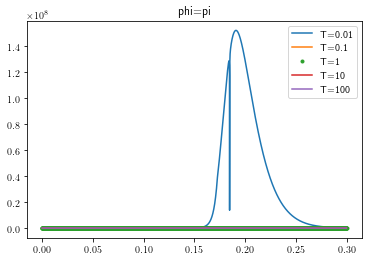

In [13]:
plt.plot(thetaarr, res[0,0,:], label='T=0.01')
plt.plot(thetaarr, res[1,0,:],label='T=0.1')
plt.plot(thetaarr, res[2,0,:], '.',label='T=1')
plt.plot(thetaarr, res[3,0,:], label='T=10')
plt.plot(thetaarr, res[4,0,:],label='T=100')
plt.title('phi=pi')
plt.legend()

In [10]:
nu = 3e9
step=0.0001
phi=0
T=1*day2sec
thetaarr=np.arange(0.049, 0.051, step)
res=np.zeros_like(thetaarr)
for k, theta in enumerate(thetaarr):
    res[k] =  funcs.integrand_scalar(theta, phi, T, nu, eps_e, eps_b, Gshmax, \
                                n0, theta_v, theta_G, theta_c, E_g)

eg= 8.216406392426892e+51
mu= 0.97986741851031
t= 208404876.41174474
gb2= 25.092437990965692
Roc= 207396299.30822778
abs(mu-bsh)= 0.0007827330162392121
(1-mu*bsh)= 0.03909286756193586
Roc**2= 4.3013224966748e+16
bsh 0.9806501515265492
res= 861227978813719.5
5.783664104121236e-20 0.20902739376539112 4.748064526975392e+19
eg= 8.204836989172123e+51
mu= 0.9798873785407272
t= 208475116.16535136
gb2= 25.03307043948816
Roc= 207463756.1595064
abs(mu-bsh)= 0.000718209941053316
(1-mu*bsh)= 0.03911696052020108
Roc**2= 4.304121011981114e+16
bsh 0.9806055884817805
res= 790261425527906.5
5.790740003860727e-20 0.2090254463936629 5.187498370029723e+19
eg= 8.193260339505269e+51
mu= 0.9799073287722704
t= 208545128.83619246
gb2= 24.97386309661534
Roc= 207530980.5989352
abs(mu-bsh)= 0.0006536120026741088
(1-mu*bsh)= 0.03914114782679967
Roc**2= 4.306910790835562e+16
bsh 0.9805609407749445
res= 719204403456282.1
5.797813022901377e-20 0.20902393234195837 5.714358233623071e+19
eg= 8.181676520117023e+51
mu= 0.

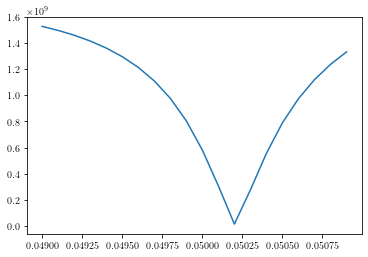

In [11]:
plt.plot(thetaarr, res)

In [3]:
theta=0.05
phi=0
T=1*day2sec
nu = 3e9

for theta in [0.049, 0.05, 0.051]:
    print('theta=',theta)
    res = funcs.integrand_scalar(theta, phi, T, nu, eps_e, eps_b, Gshmax, \
                                n0, theta_v, theta_G, theta_c, E_g)
    print('res=',res)

theta= 0.049
eg= 8.216406392426892e+51
mu= 0.97986741851031
t= 208404876.41174474
gb2= 25.092437990965692
Roc= 207396299.30822778
abs(mu-bsh)= 0.0007827330162392121
(1-mu*bsh)= 0.03909286756193586
Roc**2= 4.3013224966748e+16
bsh 0.9806501515265492
res= 861227978813719.5
5.783664104121236e-20 0.20902739376539112 4.748064526975392e+19
res= 1525718965.1207333
theta= 0.05
eg= 8.10039546423398e+51
mu= 0.9800665778412416
t= 209096984.5037819
gb2= 24.505929858985475
Roc= 208060339.07710016
abs(mu-bsh)= 0.0001341316860834496
(1-mu*bsh)= 0.03933804501599758
Roc**2= 4.328910469687789e+16
bsh 0.9802007095273251
res= 147603690007317.53
5.854293477709424e-20 0.20902731010122816 2.8401657634142162e+20
res= 581080941.3704652
theta= 0.051
eg= 7.983728698239284e+51
mu= 0.980264757105677
t= 209765859.02404672
gb2= 23.9351271068608
Roc= 208700616.38051105
abs(mu-bsh)= 0.0005219677335221995
(1-mu*bsh)= 0.039592672550066266
Roc**2= 4.355594727760523e+16
bsh 0.9797427893721548
res= 574217339159287.6
5.92463

In [4]:
8.612279788137195, 1.4760369000731753, 5.742173391592876

(713624288806402.0, -426613649151970.1)

In [5]:
phi = np.random.random()*pi
T=1*day2sec
nu = 3e9
phi=0.7334859378825609
res1=funcs.integral_theta_scalar(phi, T, nu, eps_e, eps_b, Gshmax, \
                                                n0, theta_v, theta_G, theta_c, E_g)[0]
res2=funcs.integral_theta(phi, T, nu, eps_e, eps_b, Gshmax, n0, theta_v, theta_G, theta_c, E_g, step=1.e-3)

print(phi)
print(res1,res2, (res1-res2)/res2)

0.7334859378825609
219351408.72100878 219500936.88140333 -0.0006812187798329975


In [6]:
cProfile.run('funcs.integral_theta(phi, T, nu, eps_e, eps_b, Gshmax, \
                                                n0, theta_v, theta_G, theta_c, E_g)[0]', sort=2)

         118005 function calls (111818 primitive calls) in 0.220 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.220    0.220 {built-in method builtins.exec}
        1    0.000    0.000    0.220    0.220 <string>:1(<module>)
        1    0.011    0.011    0.220    0.220 {funcs.integral_theta}
      300    0.012    0.000    0.135    0.000 _zeros_py.py:94(newton)
     2059    0.002    0.000    0.100    0.000 <__array_function__ internals>:2(isclose)
8552/2365    0.010    0.000    0.099    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     2059    0.014    0.000    0.096    0.000 numeric.py:2257(isclose)
      300    0.001    0.000    0.074    0.000 _root_scalar.py:61(root_scalar)
      300    0.000    0.000    0.071    0.000 _zeros_py.py:475(bisect)
      300    0.070    0.000    0.070    0.000 {built-in method scipy.optimize._zeros._bisect}
     4118    0.003

TypeError: 'float' object is not subscriptable

In [2]:
T=1*day2sec
nu = 3e9
funcs.integral_phi_scalar(T, nu, eps_e, eps_b, Gshmax, n0, theta_v, theta_G, theta_c, E_g)

(326480278.285803, 151.44863648386672)

In [4]:
T=1*day2sec
nu = 3e9
funcs.integral_phi(T, nu, eps_e, eps_b, Gshmax, n0, theta_v, theta_G, theta_c, E_g, step=1.e-3)

652994504.2302179

In [3]:
T=1*day2sec
nu = 3e9
%timeit funcs.integral_phi_scalar(T, nu, eps_e, eps_b, Gshmax, n0, theta_v, theta_G, theta_c, E_g)
%timeit funcs.integral_phi(T, nu, eps_e, eps_b, Gshmax, n0, theta_v, theta_G, theta_c, E_g, step=1.e-3)

31.1 s ± 243 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7min 21s ± 6.47 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
bm = 17/8/pi
u = 1/mpc2/c**3
st = (2*1.15/5)**2
def gaussian_profile(theta, theta_G, theta_c, E_g):
    res = np.zeros_like(theta)
    mask = theta<=theta_c
    res[mask] = E_g * np.exp(-0.5*(theta[mask]/theta_G)**2)
    return res

def mu(theta, phi, theta_v) :
    return np.sin(theta)*np.sin(theta_v)*np.cos(phi) + np.cos(theta)*np.cos(theta_v)

def U(t, x):
    u = 1/mpc2/c**3
    return u * x * t**(-3)

def U2t(U, x):
    u = 1/mpc2/c**3
    return (U/(u * x))**(-1/3)

# _BM = C_BM^2*t^-3 (eq.1 & 2)
def BM(U):
    bm = 17/8/pi
    return bm * U

# _ST = C_ST^2*t^-6/5
def ST(U):
    st = (2*1.15/5)**2
    return st * U**(2/5)

def A(t, x):
    return BM(U(t, x)) + ST(U(t, x))

#Gamma_shell^2 * beta_shell^2
def GB2(t, x, Gshmax) :
    val = A(t, x)
    if np.isscalar(val):
        if val>=Gshmax**2:
            val = Gshmax**2
    else:
        val[val>=Gshmax**2] = Gshmax**2
    return val

#Gamma_shell^2
def G2(t, x, Gshmax):
    return GB2(t, x, Gshmax) + 1
def G(t, x, Gshmax):
    return np.sqrt(G2(t, x, Gshmax))
#beta_shell^2
def B2(t, x, Gshmax):
    return GB2(t, x, Gshmax) / (GB2(t, x, Gshmax)+1)
def B(t, x, Gshmax):
    return np.sqrt(B2(t, x, Gshmax))

def approxBeta(t, x, Gshmax):
    res = np.zeros_like(t)
    tmin = (bm*u*x/Gshmax**2)**(1/3)
    t1 = U2t(1.e3, x)
    t2 = U2t(1.e-6, x)
    mask = (t<=tmin)
    res[mask] = np.sqrt(Gshmax**2/(Gshmax**2+1))
    mask = np.logical_and(tmin<t, t<=t1)
    res[mask] = np.sqrt(BM(U(t[mask],x))/(BM(U(t[mask],x))+1))
    mask = np.logical_and(t1<t, t<t2)
    res[mask] = B(t[mask], x, Gshmax)
    mask = (t>=t2)
    res[mask] = np.sqrt(ST(U(t[mask],x))/(ST(U(t[mask],x))+1))
    return res

def approxR(t,x,Gshmax):
    bmax = np.sqrt(Gshmax**2/(Gshmax**2+1))
    tmin = (bm*u*x/Gshmax**2)**(1/3)
    t1 = U2t(1.e3, x)
    t2 = U2t(1.e-6, x)
    if t<=tmin:
        return bmax * t
    if t>tmin and t<=t1:
        return bmax*tmin + t - tmin + 1/(8*bm*u*x)*(t**4 - tmin**4)
    if t>t1 and t<=t2:
        return bmax*tmin + t1 - tmin + 1/(8*bm*u*x)*(t1**4 - tmin**4) + sciint.quad(B, args=(x,Gshmax),a=t1, b=t)[0]
    if t>t2 :
        return bmax*tmin + t1 - tmin + 1/(8*bm*u*x)*(t1**4 - tmin**4) + sciint.quad(B, args=(x,Gshmax),a=t1, b=t2)[0] \
        + np.sqrt(st)*(u*x)**(1/5) * 5/2*(t**(2/5)-t2**(2/5))

In [3]:
x=1.e52/1.e-3
t2 = U2t(1.e-6, x)
bmax = np.sqrt(Gshmax**2/(Gshmax**2+1))
t=100*t2
aa = sciint.quad(B, args=(x,Gshmax),a=0, b=t2)
bb = approxR(t2,x, Gshmax)
print(aa,bb)

(5337170849.459059, 16.746237754821777) 5337197141.345328


In [4]:
(aa[0]-bb)/aa[0]

-4.926184117233979e-06

In [5]:
%timeit sciint.quad(B, args=(x,Gshmax),a=0, b=t)
%timeit approxR(t,x, Gshmax)


2.1 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
865 µs ± 34.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
%timeit funcs.approxR(t,x, Gshmax)

62.9 µs ± 405 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
integrale de 0 à t de BM(U(t,x)) = [bm*u*x*(-t**(-2)/2)]_0^t = bm*u. 0 est remplacé par la valeur correspondant à Gshmax^2

In [22]:
u = 1/mpc2/c**3
st = (2*1.15/5)**2
bm = 17/8/pi
x=1.e52/1.e-3
tmin=(bm*u*x/Gshmax**2)**(1/3)
bmax=np.sqrt(GB2(tmin,x,Gshmax)/(GB2(tmin,x,Gshmax)+1))
print(bmax)
#U(t,x)
t=1.e8
val1=bmax*tmin +0.25*bm*u*x*(1/tmin**2-1/t**2)
val2=sciint.quad(B, args=(x,Gshmax),a=0, b=t)
print(val1)
print(val2)

0.9999500037496876
68054099786.59503
(99952359.01363869, 0.05951782792590077)


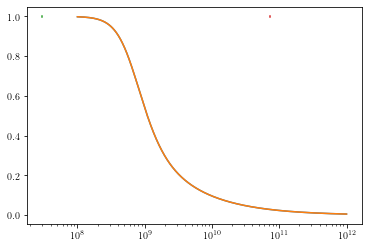

In [154]:
t=np.logspace(8,12,1000)
t1 = U2t(1.e3, x)
t2 = U2t(1.e-6, x)
plt.semilogx(t,B(t,x,Gshmax))
plt.plot(t,approxBeta(t,x,Gshmax))
#plt.plot(t,1-0.5/bm/u/x*t**3)
plt.plot([tmin,tmin],[0.998,1])
plt.plot([t2,t2],[0.998,1])
#plt.ylim(0.99975, 1)

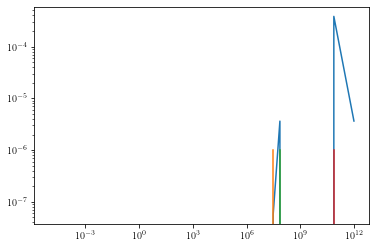

In [175]:
t=np.logspace(-5,12,1000)
plt.loglog(t,(B(t,x,Gshmax)-approxBeta(t,x,Gshmax))/B(t,x,Gshmax))
plt.plot([tmin,tmin],[0.,1.e-6])
plt.plot([t1,t1],[0.,1.e-6])
plt.plot([t2,t2],[0.,1.e-6])
#plt.ylim(0., 1.e-5)

In [105]:
BM(U(tmin,x)), bm*u*x*tmin**(-3)

(10000.000000000027, 10000.00000000003)

In [108]:
BM(U(tmin,x))/(BM(U(tmin,x))+1), bm*u*x*tmin**(-3)/(bm*u*x*tmin**(-3)+1)

(0.9999000099990001, 0.9999000099990001)

In [38]:
sciint.quad(B, args=(x,Gshmax),a=1.e-10, b=tmin)

(29874981.71067727, 3.3167892555449353e-07)

In [53]:
sciint.quad(B, args=(x,Gshmax),a=tmin, b=4.e7)

(10122699.31713187, 1.1238453853237151e-07)

In [54]:
4.e7-tmin-0.5/bm/u/x*(4.e7**4-tmin**4)/4

10122698.086994667

In [66]:
%timeit sciint.quad(B, args=(x,Gshmax),a=4.e7, b=4.e9)

324 µs ± 5.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
sciint.quad(B, args=(x,Gshmax),a=1.e4, b=1.e15)

(152019203265.29007, 912.6762390136719)

In [57]:
def smallbeta(t,x,Gshmax):
    return np.sqrt(ST(U(t,x)))
sciint.quad(smallbeta, args=(x,Gshmax),a=1.e9, b=1.e10, limit=100)

(1443353848.390345, 1.1000627344237728)

In [49]:
sciint.quad?

In [58]:
t1=1.e9
t2=1.e10
np.sqrt(st)*(u*x)**(1/5) * 5/2*(t2**(2/5)-t1**(2/5))

1443353848.3903463

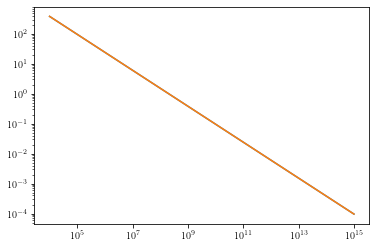

In [30]:
tarr = np.logspace(4,15,1000)
plt.loglog(tarr, smallbeta(tarr,x,Gshmax))
plt.loglog(tarr, np.sqrt(st)*(u*x)**(1/5) * tarr**(-3/5))

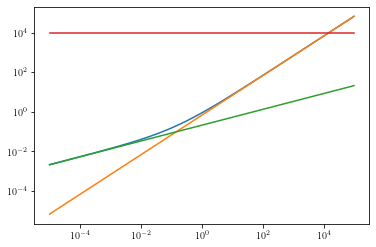

In [32]:
u=np.logspace(-5,5,1000)
plt.loglog(u, BM(u)+ST(u))
plt.loglog(u, BM(u))
plt.loglog(u, ST(u))
plt.loglog([u.min(),u.max()], [Gshmax**2,Gshmax**2] )
#plt.loglog([u.min(),u.max()], [2*bm*(st/bm)**(5/3), 2*bm*(st/bm)**(5/3)] )


In [72]:
t(1.e-4, 1.e52/1.e-3)/1.e10

1.5797668919109418

(1e-05, 10000.0)

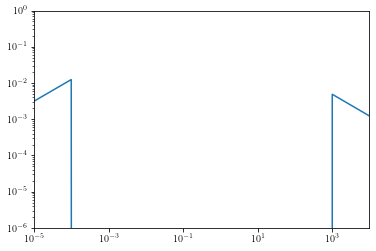

In [47]:
def approxGB2(u, Gshmax):
    GB = np.zeros_like(u)
    GB[u<1e-4] = ST(u[u<1.e-4])
    GB[u>1e3] = BM(u[u>1e3])
    GB[GB>=Gshmax**2] = Gshmax**2
    mask = np.logical_and(1e-4<=u,u<=1.e3)
    GB[mask] = ST(u[mask]) + BM(u[mask])
    return GB
plt.loglog(u, np.abs((approxGB2(u, Gshmax)-ST(u)-BM(u))/(ST(u)+BM(u))))
#plt.plot(u, ST(u)+BM(u))
plt.ylim(1.e-6, 1)
plt.xlim(1.e-5,1.e4)

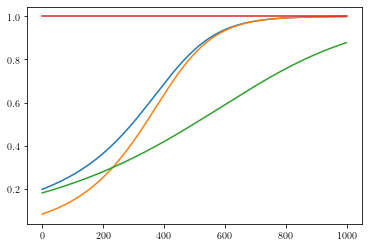

In [79]:
u=np.logspace(-2,3,1000)

bm_b = np.sqrt(BM(u)/(BM(u)+1))
st_b = np.sqrt(ST(u)/(ST(u)+1))
b = np.sqrt((ST(u)+BM(u))/((ST(u)+BM(u))+1))
bmax = np.sqrt(Gshmax**2/(Gshmax**2+1))
plt.plot(b)
plt.plot(bm_b)
plt.plot(st_b)
plt.plot([u.min(), u.max()], [bmax, bmax])

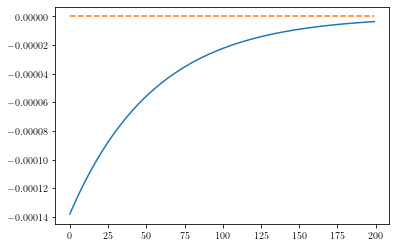

In [87]:
plt.plot((bm_b-b)[800:])
#plt.plot((st_b-b)[600:])
plt.plot(np.zeros_like(b)[800:],'--')

In [60]:
u=0.14416
BM(u)-ST(u)
bm = 17/8/pi
st = (2*1.15/5)**2
gb2_c = 2*bm*(st/bm)**(5/3)
beta_c = np.sqrt(gb2_c/(gb2_c+1))
print(beta_c)

0.4039743248310569


In [3]:
phi = np.random.random()*pi
#phi_array = np.arange(0, pi, 0.5)
theta_array = np.arange(0, theta_c, 0.001)
T=1*day2sec
nu = 3e9
xarray = gaussian_profile(theta_array, theta_G, theta_c, E_g)/n0
mu_array = np.cos(theta_array)*np.cos(theta_v) + np.sin(theta_array)*np.sin(theta_v)*np.cos(phi)

i = np.random.randint(len(xarray))
x = xarray[i]
mu = mu_array[i]


In [18]:
1/mpc2/c**3

3.94256646445544e-29

In [21]:
t_array = np.logspace(5, 12, 1000)
def tabulate_R_over_c(theta_array, t_array, Gshmax):
    return B(theta_array, t_array, Gshmax)
#tabulate_R_over_c(theta_array, t_array, Gshmax)
gridx, gridt = np.meshgrid(xarray, t_array)
gridbsh = B(gridt, gridx, Gshmax)

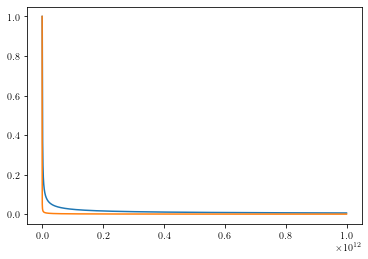

In [42]:
plt.plot(t_array, gridbsh[:,0])
#plt.semilogx(t_array, gridbsh[:,50])
#plt.semilogx(t_array, gridbsh[:,100])
#plt.semilogx(t_array, gridbsh[:,150])
#plt.semilogx(t_array, gridbsh[:,250])
plt.plot(t_array, gridbsh[:,299])

In [4]:
t=1.e10
def test():
    xarr = np.logspace(-2,np.log10(t), 1000000)
    yarr = B(xarr, x, Gshmax)
    #plt.semilogx(xarr, yarr);
    mid_points = (yarr[1:]+yarr[:-1])/2
    res = (mid_points*np.diff(xarr)).sum()

sciint.quad(B,0,t,args=(x, Gshmax), epsrel=1.e-10)

(1390530778.4039786, 0.00024285654506861487)

In [73]:

%timeit sciint.quad(B,0,t,args=(x, Gshmax), epsrel=1.e-10)


2.55 ms ± 73.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [74]:
%timeit test()

128 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
phi = np.random.random()*pi
T=0.05*day2sec
nu = 3e9
theta=0.1*theta_c
import cProfile
cProfile.run('funcs.integrand_scalar(theta,phi, T, nu, eps_e, eps_b, Gshmax, \
                            n0, theta_v, theta_G, theta_c, E_g)', sort=2)

         79 function calls (76 primitive calls) in 0.001 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 {funcs.integrand_scalar}
        1    0.000    0.000    0.000    0.000 _root_scalar.py:61(root_scalar)
        1    0.000    0.000    0.000    0.000 _zeros_py.py:475(bisect)
        1    0.000    0.000    0.000    0.000 {built-in method scipy.optimize._zeros._bisect}
        1    0.000    0.000    0.000    0.000 _zeros_py.py:94(newton)
      5/2    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(isclose)
        1    0.000    0.000    0.000    0.000 numeric.py:2257(isclose)
        2    0.000    0.

In [26]:
theta=theta_c
phi=pi/2
x=gaussian_profile(np.asarray(theta), theta_G, theta_c, E_g)/n0
m=mu(theta, phi, theta_v)
T=0.01*day2sec

%timeit funcs._find_emission_time_scalar(T, x, Gshmax, m, maxiter=50, deriv2=False)
%timeit funcs._find_emission_time_scalar(T, x, Gshmax, m, maxiter=50, deriv2=True)

118 µs ± 7.34 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
127 µs ± 8.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
4256472058.96913/T
#1/(1-mu(theta,phi, theta_v))

1.6421574301578434

In [6]:
mu=0.9689124217106447
t=159562079.37811628
Roc=159331303.75762653
(t-T)/mu-Roc

0.0

In [31]:
np.arange(0, theta_c, 0.001)[-1], theta_c

(0.299, 0.3)

131230124.6412794

In [34]:
(131140162.85245402-131230124.6412794)/131230124.6412794

-0.0006855269631975925

In [10]:
%timeit funcs.integral_phi(T, nu, eps_e, eps_b, Gshmax, n0, theta_v, theta_G, theta_c, E_g)

/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py:287: RuntimeWarning: invalid value encountered in double_scalars
  fval = func(p0, *args)


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Exception ignored in: 'funcs._func'
Traceback (most recent call last):
  File "/home/cohen/miniconda3/envs/grb/lib/python3.9/site-packages/scipy-1.9.0-py3.9-linux-x86_64.egg/scipy/optimize/_zeros_py.py", line 287, in newton
    fval = func(p0, *args)
TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


1.97 s ± 26.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
x=1.e52/1.e-3
d = np.zeros(shape=(200,100))
for i,mu in enumerate(np.arange(-1,1, 0.01)):
    for j,T in enumerate(np.logspace(np.log10(1.e-4), np.log10(150), 100)*day2sec):
        #mu=(1-2*np.random.random())
        #T=50*np.random.random()*day2sec
        d[i,j] = funcs._find_emission_time_scalar(T, x, Gshmax, mu)/T
#cProfile.run('funcs._find_emission_time_scalar(T, x, Gshmax, mu)', sort=2)

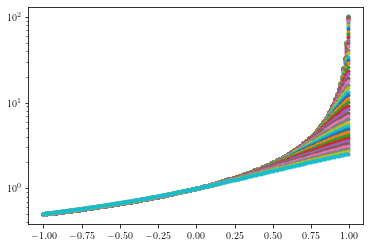

In [65]:
plt.semilogy(np.arange(-1,1, 0.01),d,'.');

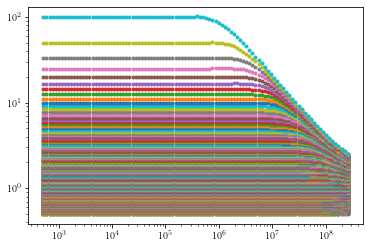

In [69]:
plt.loglog(np.logspace(np.log10(1.e-4), np.log10(50), 100)*day2sec,d.T,'.');

In [149]:
theta = min(np.random.random()*2*pi, theta_c)
phi = np.random.random()*pi
m = mu(theta, phi, theta_v)
x = gaussian_profile(np.asarray(theta), theta_G, theta_c, E_g)/n0
tmin=(bm*u*x/Gshmax**2)**(1/3)
bmax=np.sqrt(GB2(tmin,x,Gshmax)/(GB2(tmin,x,Gshmax)+1))
Tmin=(1-m*bmax)*tmin
Tmin

28418.434960977826

In [156]:
T=100*day2sec

In [157]:
#cProfile.run('funcs._find_emission_time_scalar(T, x, Gshmax, m)', sort=2)
%timeit funcs._find_emission_time_scalar(T, x, Gshmax, m)

363 µs ± 7.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [146]:
funcs._find_emission_time_scalar(T, x, Gshmax, m)

14223109.001030266